In [1]:
#Refrence material 

https://www.coursera.org/learn/unsupervised-learning-recommenders-reinforcement-learning/programming/Rqh9M/anomaly-detection/lab?path=%2Fnotebooks%2FC3_W1_Anomaly_Detection.ipynb

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('final_train_data.csv')

In [4]:
df.head(5)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [5]:
df=df.drop(['id','Product ID','Machine failure'], axis=1)

In [6]:
df.head(5)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [7]:
df['Type'] = df['Type'].replace({'H':0,'M':1,'L':2})

In [8]:
df.head(5)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,2,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,1,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,2,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,2,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,1,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [9]:
df.shape  #We have 11 features

(132133, 11)

In [10]:
df=df.drop(['Type'], axis=1)

In [11]:
df.head(5)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [12]:

# p=df['Tool wear [min]']
# z=(np.arcsin((np.log(abs(p+0.000001)**0.95))/50))   #Dont ask Y,hehe
# df['Tool wear [min]']=z

# df['TWF'] = df['TWF'].replace({0: 0.01, 1: 0.99})
# df['HDF'] = df['HDF'].replace({0: 0.01, 1: 0.99})
# df['PWF'] = df['PWF'].replace({0: 0.01, 1: 0.99})
# df['OSF'] = df['OSF'].replace({0: 0.01, 1: 0.99})
# df['RNF'] = df['RNF'].replace({0: 0.01, 1: 0.99})

In [13]:
import numpy as np
from scipy.stats import norm

def binnary_to_gaussian(lis):
    binary_data = np.array(lis)
    # Step 1: Calculate empirical cumulative distribution function (CDF)
    cdf = np.cumsum(binary_data) / np.sum(binary_data)

    # Step 2: Map binary data to uniform distribution
    uniform_data = np.random.uniform(size=len(binary_data))

    # Step 3: Map uniform data to Gaussian distribution
    gaussian_data = norm.ppf(uniform_data)

    # Step 4: Standardize the transformed data
    gaussian_data = (gaussian_data - np.mean(gaussian_data)) / np.std(gaussian_data)
    return gaussian_data

In [14]:
df["TWF"]=binnary_to_gaussian(df["TWF"])
df["HDF"]=binnary_to_gaussian(df["HDF"])
df["PWF"]=binnary_to_gaussian(df["PWF"])
df["OSF"]=binnary_to_gaussian(df["OSF"])
df["RNF"]=binnary_to_gaussian(df["RNF"])

C:\Users\hrith\AppData\Local\Temp\ipykernel_22648\3141000649.py:7: RuntimeWarning: invalid value encountered in divide
  cdf = np.cumsum(binary_data) / np.sum(binary_data)


In [15]:
df.head(5)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,300.6,309.6,1596,36.1,140,-0.293982,0.187546,0.507519,-0.019467,-0.502125
1,302.6,312.1,1759,29.1,200,-2.543647,1.147037,0.492456,-0.463134,1.212275
2,299.3,308.5,1805,26.5,25,-0.635780,0.190421,-0.220918,-0.504579,-0.666660
3,301.0,310.9,1524,44.3,197,-1.193018,0.785395,-1.540666,0.411023,-0.392082
4,298.0,309.0,1641,35.4,34,-0.642643,-1.058954,-0.885291,0.053746,-1.147510


In [16]:
df['TWF'].value_counts()

-0.293982    1
 0.876664    1
-1.519996    1
 0.807195    1
 0.155163    1
            ..
-0.425193    1
 0.778452    1
 0.576737    1
-1.003950    1
-0.282801    1
Name: TWF, Length: 132133, dtype: int64

Text(0.5, 0, 'Data')

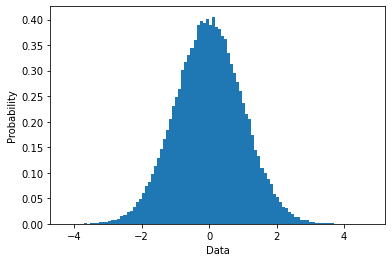

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(df['TWF'],density=True, bins=100)
plt.ylabel('Probability')
plt.xlabel('Data')

In [17]:
# df.sample(30000,random_state=1)  #Taking random 30k values

In [18]:
#converting dataframe to array

In [19]:
x = df.to_numpy()

In [20]:
x.shape

(132133, 10)

In [21]:
# def estimate_gaussian(X):
# #     X -> (m,n) array -> m =examples and n=attributes
# #     returns : mu -> mean and var -> variance ; (n dimensional arrays) -> (n,)
#     #code:
    
#     m,n=X.shape
#     mu_=(1/m)*np.sum(X,axis=0)
#     mu=mu_.T
#     var_=np.sum(((X-mu)**2),axis=0)/m
#     var=var_.T
    
#     return mu,var
        
        


In [22]:
def estimate_gaussian(X):
#     X -> (m,n) array -> m =examples and n=attributes
#     returns : mu -> mean and var -> variance ; (n dimensional arrays) -> (n,)
    #code:
    
    m,n=X.shape
    mu_=(1/m)*np.sum(X,axis=0)
    mu=mu_.T
#     var_=np.sum(((X-mu)**2),axis=0)/m
#     var=var_.T
    
#     return mu,var
    var=[]
    for i in range(10):
        if i<5:
            v=np.sum((X[:,i]-mu[i])**2,axis=0)/m
            var.append(v)
        else:
            v=mu[i]*(1-mu[i])
            var.append(v)
            
    var_=np.array(var)
    var=var_.T

    return mu,var
        
        
        

In [23]:
mu,var=estimate_gaussian(x)

In [24]:
mu.shape

(10,)

In [25]:
mu

array([ 2.99847440e+02,  3.09936064e+02,  1.52146350e+03,  4.01870549e+01,
        1.03936534e+02, -2.57043606e-17,  4.16754800e-18, -2.23031037e-17,
       -2.92400545e-17, -1.50569476e-17])

In [26]:
var.shape

(10,)

In [27]:
var

array([ 3.44398299e+00,  1.92335262e+00,  1.82080950e+04,  6.90629176e+01,
        4.05841599e+03, -2.57043606e-17,  4.16754800e-18, -2.23031037e-17,
       -2.92400545e-17, -1.50569476e-17])

In [28]:
# #Wrong function -> correct function present bellow
# #Multivariance gussian
# def multivariance_gussian(X,mu,var):
# #     X -> (m,n) array -> m =examples and n=attributes
# #     mu -> (ndarary,)
# #     var -> (ndarray,)
    
#     #code:
#     n_features=X.shape[1]
#     #constant = 1 / ((2 * np.pi) ** (n_features / 2) * np.sqrt(np.prod(var+(1e-10))))
#     constant=1
#     # Compute the exponent term of the Gaussian function
#     exponent = -np.sum(((X - mu) ** 2) / (var+(1e-10)), axis=1)
    
#     # Compute the probabilities for each sample
#     probabilities = constant * np.exp(exponent)
    
#     return probabilities
    

In [29]:
# constant = 1 / (1 * np.sqrt(np.prod(var+(1e-10))))   #This is wrong

In [30]:
# constant

In [31]:
# var

In [32]:
# multiple=[]
# for i in range(len(var)):
#     if var[i]==0:
#         multiple.append(10**(10))
#     else :
#         multiple.append((1/var[i]))
        
        

In [33]:
# multiple

In [34]:
# exponent = -((x - mu) ** 2) / (var+(1e-10))

In [35]:
# exponent.shape

In [36]:
# pow_term=np.exp(exponent)

In [37]:
# pow_term.shape

In [38]:
# arr=multiple*pow_term

In [39]:
# arr.shape

In [40]:
# result = np.prod(arr, axis=1)

In [41]:
# result.shape

In [76]:
mu

array([ 2.99847440e+02,  3.09936064e+02,  1.52146350e+03,  4.01870549e+01,
        1.03936534e+02, -2.57043606e-17,  4.16754800e-18, -2.23031037e-17,
       -2.92400545e-17, -1.50569476e-17])

In [77]:
var

array([ 3.44398299e+00,  1.92335262e+00,  1.82080950e+04,  6.90629176e+01,
        4.05841599e+03, -2.57043606e-17,  4.16754800e-18, -2.23031037e-17,
       -2.92400545e-17, -1.50569476e-17])

In [78]:
#Multivariance gussian
# def multivariance_gussian(X,mu,var):
# #     X -> (m,n) array -> m =examples and n=attributes
# #     mu -> (ndarary,)
# #     var -> (ndarray,)
    
#     #code:
#     n_features=X.shape[1]
#     #constant = 1 / ((2 * np.pi) ** (n_features / 2) * np.sqrt(np.prod(var+(1e-10))))
#     #constant=1
#     multiple=[]                      # array of 1/var basically
#     for i in range(len(var)):
#         if var[i]==0:
#             multiple.append(10**(10))
#         else :
#             multiple.append((1/var[i]))
        
#     # Compute the exponent term of the Gaussian function
#     #exponent = -np.sum(((X - mu) ** 2) / (var+(1e-10)), axis=1)
#     exponent = -((X - mu) ** 2) / (var+(1e-10))
#     pow_term=np.exp(exponent)
#     gaussian_array=multiple*pow_term
    
    
#     # Compute the probabilities for each sample
#     #probabilities = constant * np.exp(exponent)
#     probabilities = np.prod(gaussian_array, axis=1)
    
#     return probabilities
    

In [79]:
    n_features=x.shape[1]
    #constant = 1 / ((2 * np.pi) ** (n_features / 2) * np.sqrt(np.prod(var+(1e-10))))
    #constant=1
    multiple=[]                      # array of 1/var basically
    for i in range(len(var)):
        if var[i]==0:
            multiple.append(10**(10))
        else :
            multiple.append((1/var[i]))
        
    # Compute the exponent term of the Gaussian function
    #exponent = -np.sum(((X - mu) ** 2) / (var+(1e-10)), axis=1)
    exponent = -((x - mu) ** 2) / (var+(1e-10))
    pow_term=np.exp(exponent)
    gaussian_array=multiple*pow_term
    
    
    # Compute the probabilities for each sample
    #probabilities = constant * np.exp(exponent)
    probabilities = np.prod(gaussian_array, axis=1)

In [80]:
# p=multivariance_gussian(x,mu,var)

In [83]:
multiple

[0.29036148081799584,
 0.5199254612534614,
 5.492062732417505e-05,
 0.014479550456998317,
 0.0002464015524537732,
 -3.890390491392166e+16,
 2.3994924579167165e+17,
 -4.483680903882955e+16,
 -3.4199662618583092e+16,
 -6.6414523388766264e+16]

In [85]:
pow_term

array([[0.84836441, 0.94297075, 0.73703344, ..., 0.        , 0.        ,
        0.        ],
       [0.11080891, 0.08763175, 0.04510244, ..., 0.        , 0.        ,
        0.        ],
       [0.91665991, 0.34224364, 0.01209176, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.88369282, 0.1642519 , 0.99964671, ..., 0.        , 0.        ,
        0.        ],
       [0.36916417, 0.61686809, 0.73747392, ..., 0.        , 0.        ,
        0.        ],
       [0.08025968, 0.17329886, 0.93299434, ..., 0.        , 0.        ,
        0.        ]])

In [87]:
gaussian_array=multiple*pow_term
gaussian_array*1000

array([[ 2.46332346e+02,  4.90274502e+02,  4.04783390e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 3.21746390e+01,  4.55619780e+01,  2.47705408e-03, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 2.66162728e+02,  1.77941180e+02,  6.64086929e-04, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [ 2.56590356e+02,  8.53987432e+01,  5.49012245e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.07191054e+02,  3.20725424e+02,  4.05025301e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 2.33043191e+01,  9.01024908e+01,  5.12406347e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [88]:
probabilities = np.prod(gaussian_array, axis=1)

In [89]:
probabilities.shape

(132133,)

In [90]:
probabilities

array([0., 0., 0., ..., 0., 0., 0.])

In [46]:
# #Selecting an epsilon for detecting threshold
# def select_threshold(y_val, p_val): 
#     """
#     Finds the best threshold to use for selecting outliers 
#     based on the results from a validation set (p_val) 
#     and the ground truth (y_val)
    
#     Args:
#         y_val (ndarray): Ground truth on validation set
#         p_val (ndarray): Results on validation set
        
#     Returns:
#         epsilon (float): Threshold chosen 
#         F1 (float):      F1 score by choosing epsilon as threshold
#     """ 

#     best_epsilon = 0
#     best_F1 = 0
#     F1 = 0
    
#     step_size = (max(p_val) - min(p_val)) / 1000
    
#     for epsilon in np.arange(min(p_val), max(p_val), step_size):
    
#         ### START CODE HERE ### 
#         predictions = (p_val < epsilon)
#         tp = np.sum((predictions == 1) & (y_val == 1))
#         fn = np.sum((predictions == 0) & (y_val == 1))
#         fp = np.sum((predictions == 1) & (y_val == 0))
#         prec = tp / (tp + fp)
#         rec = tp / (tp + fn)
#         F1 = 2 * prec * rec / (prec + rec)
        
        
#         ### END CODE HERE ### 
        
#         if F1 > best_F1:
#             best_F1 = F1
#             best_epsilon = epsilon
        
#     return best_epsilon, best_F1

In [47]:
#Selecting an epsilon for detecting threshold
def select_threshold(y_val, p_val): 
    """
    Finds the best threshold to use for selecting outliers 
    based on the results from a validation set (p_val) 
    and the ground truth (y_val)
    
    Args:
        y_val (ndarray): Ground truth on validation set
        p_val (ndarray): Results on validation set
        
    Returns:
        epsilon (float): Threshold chosen 
        F1 (float):      F1 score by choosing epsilon as threshold
    """ 

    best_epsilon = 0
    best_F1 = 0
    F1 = 0
   
    step_size = (max(p_val) - min(p_val)) / 1000
    
    for epsilon in np.arange(min(p_val)+step_size*20, max(p_val), step_size):
    
        ### START CODE HERE ### 
        predictions = (p_val < epsilon)
        predictions = predictions.astype(int)
        tp = np.sum((predictions == 1) & (y_val == 1))
        fn = np.sum((predictions == 0) & (y_val == 1))
        fp = np.sum((predictions == 1) & (y_val == 0))
        prec = tp / (tp + fp)
        rec = tp / (tp + fn)
        F1 = 2 * prec * rec / (prec + rec)
        
        
        ### END CODE HERE ### 
        
        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon
        
    return best_epsilon, best_F1

In [48]:
df_cv=pd.read_csv('final_cv_data_.csv')

In [49]:
df_cv.head(5)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,90418,L49271,L,299.5,309.2,1399,47.4,20,0,0,0,0,0,0
1,103002,L53040,L,301.3,311.0,1497,45.5,84,0,0,0,0,0,0
2,9653,L54424,L,299.8,309.7,1472,42.3,193,0,0,0,0,0,0
3,106459,M16074,M,296.8,307.8,1419,47.3,0,0,0,0,0,0,0
4,133925,L50355,L,300.3,309.6,1488,39.7,82,0,0,0,0,0,0


In [50]:
df_cv['Machine failure'].value_counts()

0    1157
1    1139
Name: Machine failure, dtype: int64

In [51]:
y = df_cv['Machine failure']

In [52]:
y = y.to_numpy()

In [53]:
y.shape

(2296,)

In [54]:
df_cv=df_cv.drop(['id','Product ID','Machine failure','Type'], axis=1)

In [55]:
df_cv.head(5)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,299.5,309.2,1399,47.4,20,0,0,0,0,0
1,301.3,311.0,1497,45.5,84,0,0,0,0,0
2,299.8,309.7,1472,42.3,193,0,0,0,0,0
3,296.8,307.8,1419,47.3,0,0,0,0,0,0
4,300.3,309.6,1488,39.7,82,0,0,0,0,0


In [56]:
# p=df_cv['Tool wear [min]']
# z=(np.arcsin((np.log(abs(p+0.000001)**0.95))/50) )  #Dont ask Y,hehe
# df_cv['Tool wear [min]']=z
# df_cv['TWF'] = df_cv['TWF'].replace({0: 0.01, 1: 0.99})
# df_cv['HDF'] = df_cv['HDF'].replace({0: 0.01, 1: 0.99})
# df_cv['PWF'] = df_cv['PWF'].replace({0: 0.01, 1: 0.99})
# df_cv['OSF'] = df_cv['OSF'].replace({0: 0.01, 1: 0.99})
# df_cv['RNF'] = df_cv['RNF'].replace({0: 0.01, 1: 0.99})

In [57]:
df_cv["TWF"]=binnary_to_gaussian(df_cv["TWF"])
df_cv["HDF"]=binnary_to_gaussian(df_cv["HDF"])
df_cv["PWF"]=binnary_to_gaussian(df_cv["PWF"])
df_cv["OSF"]=binnary_to_gaussian(df_cv["OSF"])
df_cv["RNF"]=binnary_to_gaussian(df_cv["RNF"])

In [58]:
df_cv.head(5)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,299.5,309.2,1399,47.4,20,0.391448,-0.039270,0.809327,3.077020,0.109959
1,301.3,311.0,1497,45.5,84,-2.056807,0.169493,0.844636,1.105738,0.703469
2,299.8,309.7,1472,42.3,193,0.220291,-0.213439,0.435419,-0.846550,-0.427516
3,296.8,307.8,1419,47.3,0,-0.259891,1.291609,0.553542,-0.122114,-0.367063
4,300.3,309.6,1488,39.7,82,-0.701182,-0.370653,0.087060,-0.031807,0.357851


In [59]:
x_cv = df_cv.to_numpy()

In [60]:
x_cv.shape

(2296, 10)

In [61]:
# y->   ground truth labels array
# x_cv->cross validation dataset array

In [62]:
p_val=multivariance_gussian(x_cv,mu,var)

In [63]:
p_val.shape

(2296,)

In [64]:
p_val

array([0., 0., 0., ..., 0., 0., 0.])

In [65]:
best_epsilon, best_F1=select_threshold(y, p_val)

C:\Users\hrith\AppData\Local\Temp\ipykernel_22648\804832922.py:23: RuntimeWarning: invalid value encountered in double_scalars
  for epsilon in np.arange(min(p_val)+step_size*20, max(p_val), step_size):


ValueError: arange: cannot compute length

In [ ]:
best_epsilon

In [ ]:
outliers = p_val < best_epsilon

In [ ]:
outliers =outliers.astype(int)

In [ ]:
outliers.shape

In [ ]:
#Counting the number of correct predictions :
count_correct=0
for i in range(len(outliers)):
    if outliers[i]==y[i]:
       count_correct=count_correct+1

In [ ]:
print(count_correct)   #Correct Precictions

In [ ]:
y.shape    #Total Predictions

In [ ]:
# Detected 1807 outoff 2296 cases correctly for cross validation set

In [ ]:
1807/2296

In [ ]:
c=0
for i in range(len(y)):
    if y[i]==1:
        c=c+1
    

In [ ]:
print(c)

In [ ]:
# 1139 -> not working

In [ ]:
#Counting when machine was faulty and was detected as faulty
count_faulty_correct=0
for i in range(len(outliers)):
    if outliers[i]==1 and y[i]==1:
        count_faulty_correct=count_faulty_correct+1

In [ ]:
print(count_faulty_correct)   #Not working engines detected

In [ ]:
# Detected 1082 outoff 1139 not working engines correctly for cross validation set

In [ ]:
1082/1139

78.7% overall accuracy, and 94.99% accuracy for detecting faulty engines

In [ ]:
#Plotting Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm_train = confusion_matrix(y,outliers)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot()
plt.show()

In [ ]:
1101/(1101+38)*100

In [ ]:
(1101+617)/(617+38+1101+540)*100

In [ ]:
# import numpy as np
# from scipy.stats import norm

# # Binary data
# binary_data = np.array(df_cv["TWF"])

# # Step 1: Calculate empirical cumulative distribution function (CDF)
# cdf = np.cumsum(binary_data) / np.sum(binary_data)

# # Step 2: Map binary data to uniform distribution
# uniform_data = np.random.uniform(size=len(binary_data))

# # Step 3: Map uniform data to Gaussian distribution
# gaussian_data = norm.ppf(uniform_data)

# # Step 4: Standardize the transformed data
# gaussian_data = (gaussian_data - np.mean(gaussian_data)) / np.std(gaussian_data)

# print("Binary Data:", binary_data)
# print("Gaussian Data:", gaussian_data)